# Produit de convolution

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True
plt.rc('text', usetex=True)

## Avant propos

Le produit de convolution entre deux signaux $x$ et $y$ à temps discret est défini par :

$$
(x*y)[n] = \sum_{m=-\infty}^{+\infty} x[m]y[n-m].
$$

La fonction `numpy.convolve` calcule le produit de convolution et renvoie le résultat complet (`full`) ou tronqué (`same` et `valid`).

In [2]:
def print_nan(label, array):

    # Nom du signal
    txt = f"{label}\t"
    
    # Valeurs
    txt += "= [ "
    for n in array:
        txt += f"{n}, "
    txt += "\b\b ]"

    # Longeur du signal
    N = len(array)
    txt += f"   (len = {N})"
    
    # Affichage
    print(txt)

In [3]:
def myplot(n, x, label, color="C0", markersize=4, ax=None):

    # Paramètres d'affichage
    xmin, xmax = -1, 7
    ymin, ymax = -10, 10

    if not ax:
        fig, ax = plt.subplots(1, 1, figsize=(8,4))
    ax.axvline(0, color="#333", linewidth=.8)
    ax.axhline(0, color="#333", linewidth=.8)
    ax.plot(n, x, marker='o', fillstyle='none', color=color, linestyle='none',
             markersize=markersize, markeredgewidth=2, label=label)
    ax.set_xticks(range(xmin, xmax+1))
    ax.set_xlim([xmin-.5, xmax+.5])
    ax.set_yticks(range(ymin, ymax+1, 2))
    ax.set_ylim([ymin-1, ymax+1])
    ax.tick_params(axis='both', which='major', labelsize=14)
    ax.legend(fontsize=14)
    return ax

x	= [ 7, 2, 1, 8 ]   (len = 4)
y	= [ 1, -1, 1 ]   (len = 3)
"full"	= [ 7, -5, 6, 9, -7, 8 ]   (len = 6)
"same"	= [ -5, 6, 9, -7 ]   (len = 4)
"valid"	= [ 6, 9 ]   (len = 2)


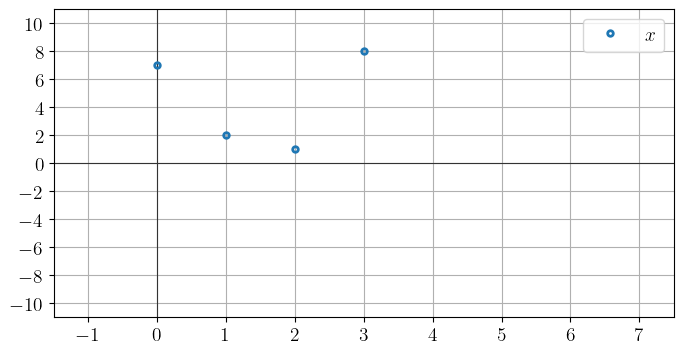

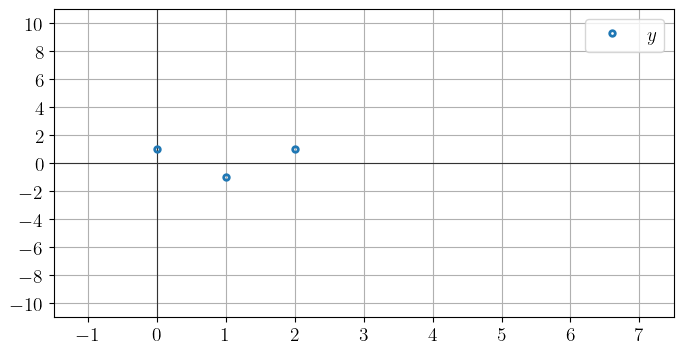

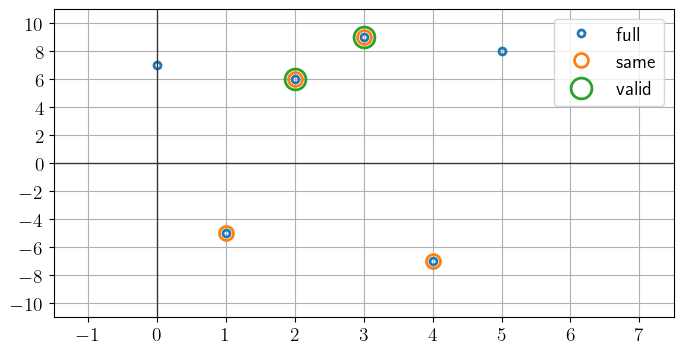

In [4]:
# Signaux et origines
nxo = 0
x = np.array([7, 2, 1, 8])
nyo = 0
y = np.array([1, -1, 1])

# Longueurs et abscisses
X = len(x)
Y = len(y)
nx = np.arange(0, X) + nxo
ny = np.arange(0, Y) + nyo

# Affichage de x
print_nan('x', x)
myplot(nx, x, label="$x$")

# Affichage de y
print_nan('y', y)
myplot(ny, y, label="$y$")

# Affichage des convolutions
modes = [
    ['full',  'C0',  5],
    ['same',  'C1', 10],
    ['valid', 'C2', 15],
]
ax = None
for mode, color, ms in modes:
    
#     if mode == 'full':
#         z = []
#     if mode == 'same':
#         z = -np.ones(int(np.floor((M-1)/2)))
#     if mode == 'valid':
#         z = -np.ones(M-1)
    w = np.convolve(x, y, mode=mode)
    
#     w = np.concatenate([z, w, z])
    print_nan(f'"{mode}"', w)

    nw = range(len(w))
    if mode=='full':
        nw = np.arange(X+Y-1) + (nxo+nyo)
    if mode=='same':
        nw = nx + (nxo+nyo) + np.floor((Y-1)/2)
    if mode=='valid':
        nw = np.arange(X-Y+1) + (nxo+nyo) + np.floor((Y-1)/2) - np.floor((1-Y)/2)
    ax = myplot(nw, w, label=f"{mode}", color=color, markersize=ms, ax=ax)

## Premier produit de convolution

Comme pour la porte, l'impulsion discrète est définie avec `numpy.where`.

Attention à l'utilisation de la fonction `numpy.arange` utilisée pour définir les abscisses !

In [5]:
n = np.arange(-10, 10+1)

x = np.sin(2*np.pi*n/10)
y = np.where( n==5 , 3, 0)

z = np.convolve(x, y, mode="same")

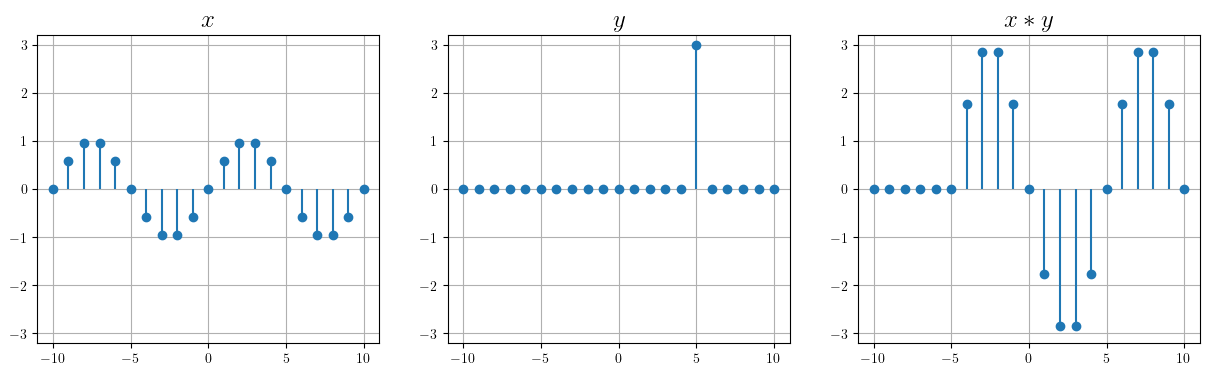

In [6]:
ylim=[-3.2, 3.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    plt.stem(n, s, basefmt=" ")
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* On voit là l'effet de la convolution par une impulsion discrète :
  le signal $x$ est décalé de 5 échantillons (lieu de l'impulsion) et amplifié de 3 (amplitude de l'impulsion).
* Mais comment expliquer la présence d'échantillons nuls en début du signal $x*y$ ?

## Deuxième produit de convolution

In [7]:
n = np.arange(-10, 10+1)

x = np.where( np.absolute(n)==1 , 1, 0) + np.where( n==0 , 2, 0)
y = np.where( n==-1 , -1, 0) + np.where( n==1 , 1, 0)

z = np.convolve(x, y, mode="same")

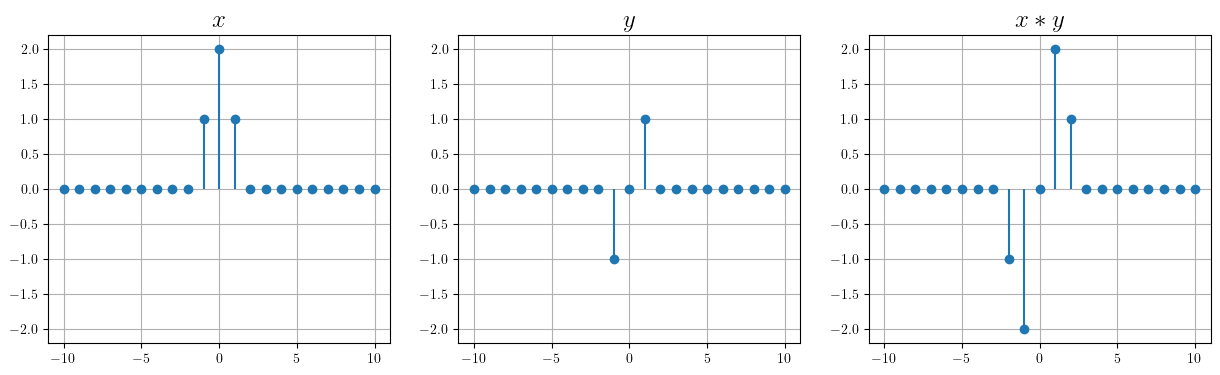

In [8]:
ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(15,4))
for i, s in enumerate([x, y, z]):
    plt.subplot(1,3,i+1)
    plt.stem(n, s, basefmt=" ")
    plt.ylim(ylim)
    plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

Détail du calcul du produit de convolution :

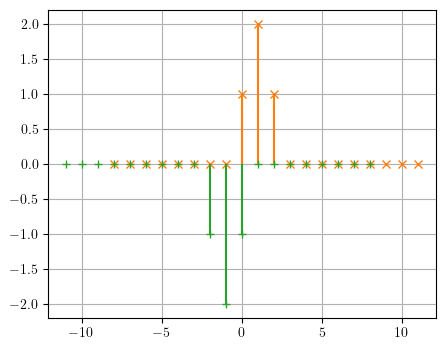

In [9]:
ylim=[-2.2, 2.2]
titles = ["x", "y", "x*y"]
plt.figure(figsize=(5,4))
plt.stem(n[1:]+1, x[1:], basefmt=" ", linefmt="C1", markerfmt="C1x")
plt.stem(n[:-1]-1, -x[:-1], basefmt=" ", linefmt="C2", markerfmt="C2+")
plt.ylim(ylim)
# plt.title(f"${titles[i]}$", fontsize=18)
plt.show()

* Comme précédemment, la convolution par chaque impulsion de $y$ va décaler et amplifer le signal $x$ d'autant. La convolution de la somme étant la somme des convolutions (opération linéaire), alors le résultat $x*y$ est la somme des deux convolutions.

## Troisième produit de convolution

In [10]:
# https://www.kaggle.com/robikscube/hourly-energy-consumption
x = np.loadtxt("AEP-2005.csv", delimiter=',', skiprows=0)
N = len(x)
t = np.arange(N) / 24 + 1

D = 24*7
y = np.ones(D) / D
t2 = np.arange(len(y)) / 24

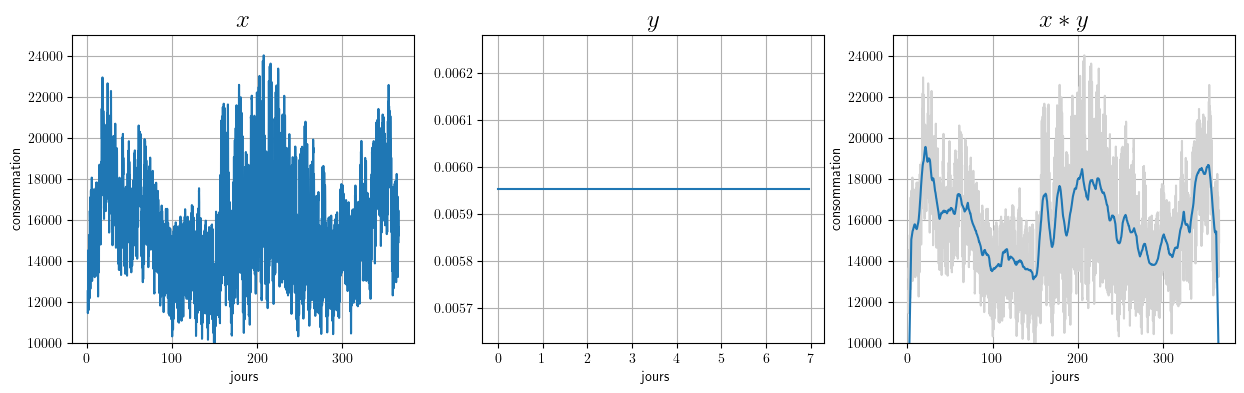

In [11]:
z = np.convolve(x, y, mode="same")

plt.figure(figsize=(15,4))

plt.subplot(1,3,1)
plt.plot(t, x)
plt.ylim([10e3, 25e3])
plt.title("$x$", fontsize=18)
plt.xlabel('jours')
plt.ylabel('consommation')

plt.subplot(1,3,2)
plt.plot(t2, y)
plt.title("$y$", fontsize=18)
plt.xlabel('jours')

plt.subplot(1,3,3)
plt.plot(t, x, color='lightgray')
plt.plot(t, z)
plt.ylim([10e3, 25e3])
plt.title("$x*y$", fontsize=18)
plt.xlabel('jours')
plt.ylabel('consommation')

plt.show()

* La convolution par un porte revient à calculer chaque échantillon de $x*y$ comme la moyenne de 24×7 échantillons de $y$.
* On procède donc à un moyennage du signal, qui a pour effet d'adoucir (lisser) le signal très perturbé ("bruité") par une porte.
  C'est une véritable technique pour débruiter un signal.